In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import missingno as mno
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_excel("Base_OP.xlsx")
data

,Observatory,Data_year,agglomeration,Zone_complementaire,Type_habitat,epoque_construction_homogene,anciennete_locataire_homogene,nombre_pieces_homogene,loyer_1_decile,loyer_1_quartile,...,surface_moyenne,nombre_observations,nombre_logements,methodologie_production,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,B1300,2022,Agglom�ration d'Aix-Marseille,NaN,NaN,NaN,NaN,NaN,9.0,3.0,...,450.0,540.0,670.0,837,1100.0,770.0,60.0,25214.0,222225.0,Estimation directe
1,B1300,2022,Agglom�ration d'Aix-Marseille,NaN,NaN,NaN,NaN,Maison 1-3P,9.0,7.0,...,600.0,673.0,798.0,950,1200.0,828.0,63.0,445.0,14886.0,Estimation directe
2,B1300,2022,Agglom�ration d'Aix-Marseille,NaN,NaN,NaN,NaN,Ensemble 4P+,7.0,9.0,...,650.0,790.0,1000.0,1250,1550.0,1136.0,97.0,3288.0,46880.0,Estimation directe
3,B1300,2022,Agglom�ration d'Aix-Marseille,NaN,NaN,NaN,NaN,Maison 4P+,7.0,5.0,...,850.0,1000.0,1205.0,1490,1700.0,1305.0,112.0,655.0,16549.0,Estimation directe
4,B1300,2022,Agglom�ration d'Aix-Marseille,NaN,NaN,NaN,NaN,Appart 1P,12.0,2.0,...,350.0,400.0,455.0,515,565.0,458.0,28.0,4144.0,30467.0,Estimation directe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,B9710,2022,Agglom�ration de Cap Excellence,NaN,Appartement,3. Entre 1971-1990,NaN,NaN,9.0,7.0,...,500.0,600.0,664.0,800,911.0,704.0,56.0,289.0,895.0,Estimation directe
4880,B9710,2022,Agglom�ration de Cap Excellence,NaN,Appartement,3. Entre 1971-1990,NaN,Appart 1P,NaN,NaN,...,NaN,28.0,NaN,Estimation directe,NaN,NaN,NaN,NaN,NaN,NaN
4881,B9710,2022,Agglom�ration de Cap Excellence,NaN,Appartement,3. Entre 1971-1990,NaN,Appart 2P,10.0,4.0,...,521.0,589.0,620.0,650,669.0,605.0,42.0,132.0,221.0,Estimation directe
4882,B9710,2022,Agglom�ration de Cap Excellence,NaN,Appartement,3. Entre 1971-1990,NaN,Appart 3P,9.0,2.0,...,545.0,700.0,780.0,890,950.0,775.0,66.0,102.0,425.0,Estimation directe


In [6]:
data.columns

Index(['Observatory', 'Data_year', 'agglomeration', 'Zone_complementaire',
       'Type_habitat', 'epoque_construction_homogene',
       'anciennete_locataire_homogene', 'nombre_pieces_homogene',
       'loyer_1_decile', 'loyer_1_quartile', 'loyer_median',
       'loyer_3_quartile', 'loyer_9_decile', 'loyer_moyen',
       'loyer_mensuel_1_decile', 'loyer_mensuel_1_quartile',
       'loyer_mensuel_median', 'loyer_mensuel_3_quartile',
       'loyer_mensuel_9_decile', 'moyenne_loyer_mensuel', 'surface_moyenne',
       'nombre_observations', 'nombre_logements', 'methodologie_production',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

In [8]:
data2 = data[['surface_moyenne', 'nombre_logements','moyenne_loyer_mensuel']]
data2

,surface_moyenne,nombre_logements,moyenne_loyer_mensuel
0,450.0,670.0,9.0
1,600.0,798.0,1.0
2,650.0,1000.0,7.0
3,850.0,1205.0,6.0
4,350.0,455.0,5.0
...,...,...,...
4879,500.0,664.0,6.0
4880,NaN,NaN,NaN
4881,521.0,620.0,2.0
4882,545.0,780.0,8.0


In [10]:
data2.isna().sum()/data.shape[0]

surface_moyenne          0.232187
nombre_logements         0.235258
moyenne_loyer_mensuel    0.228501
dtype: float64

<Axes: >

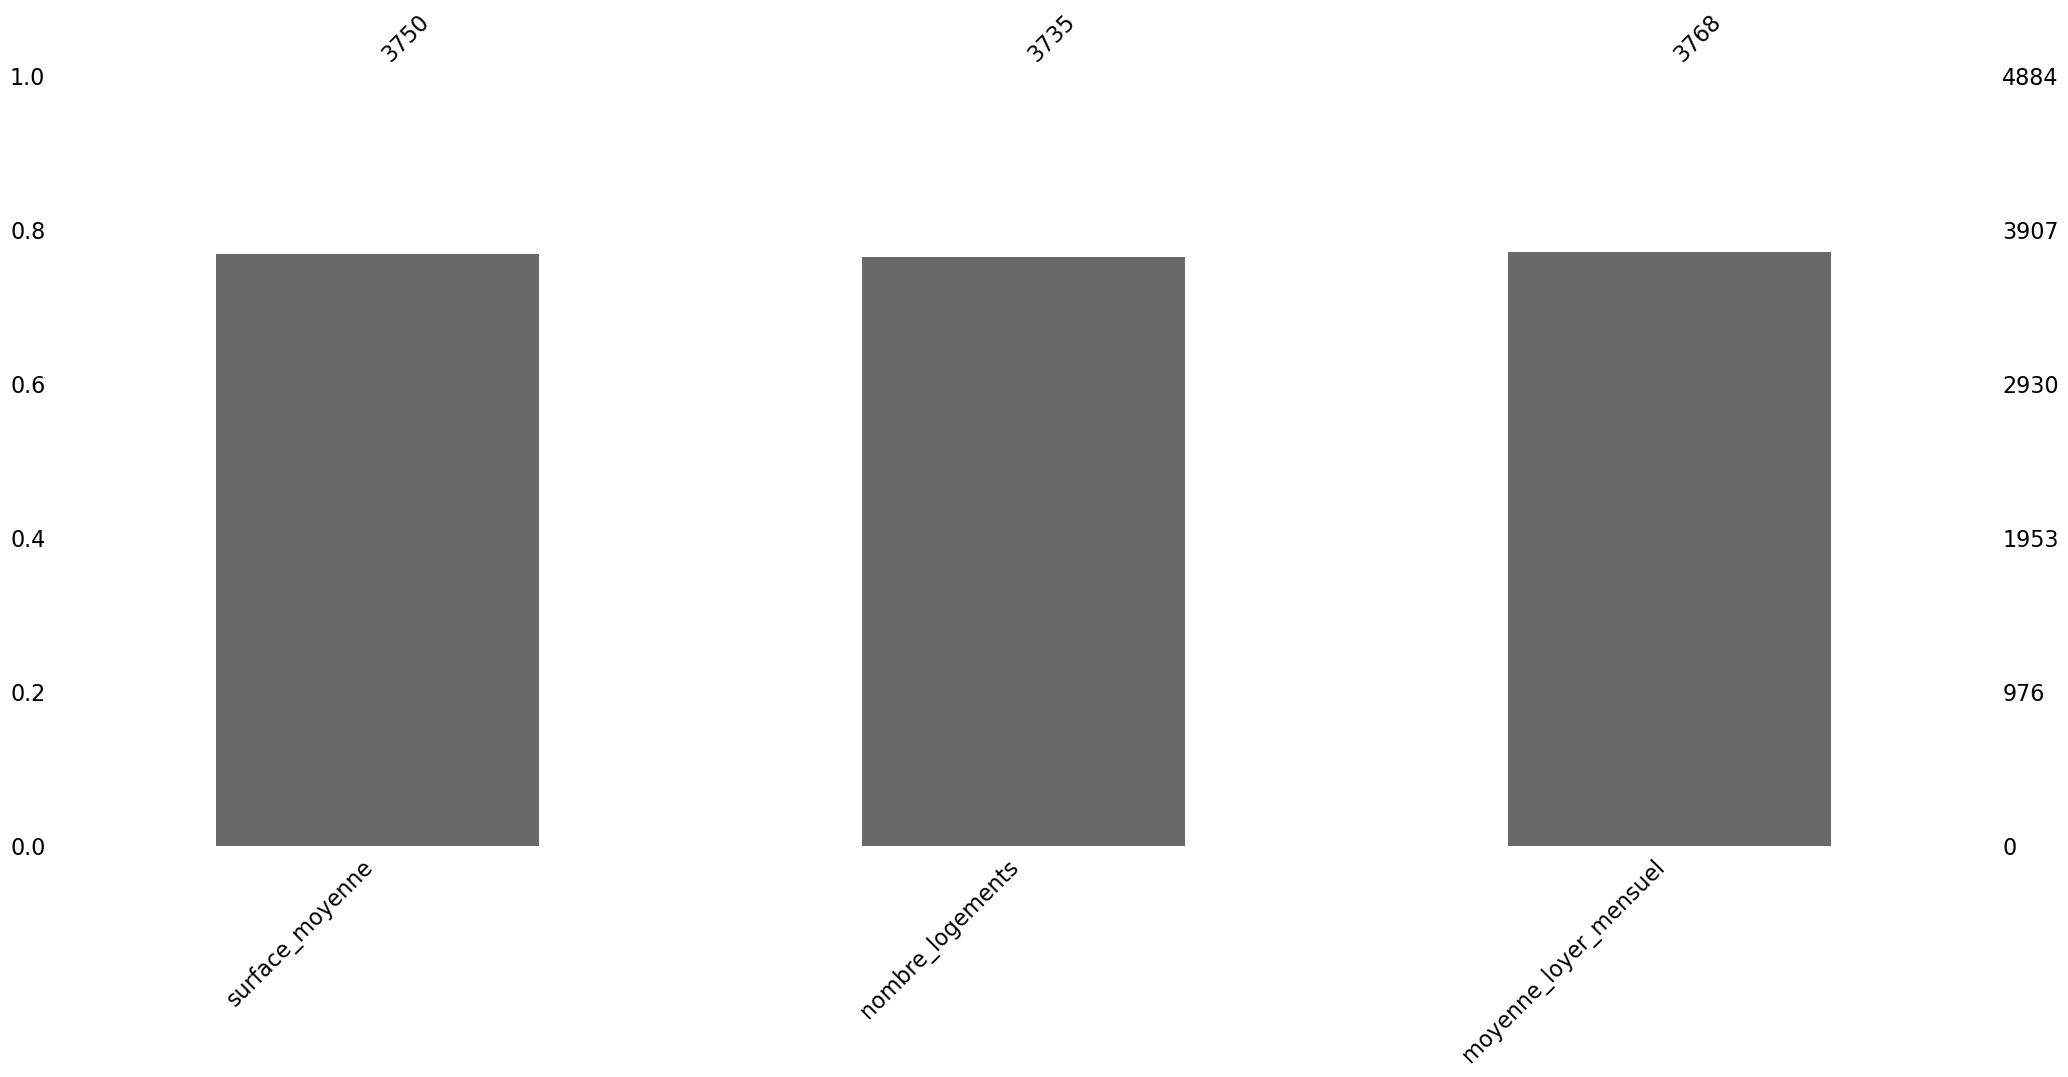

In [12]:
mno.bar(data2)

<Axes: >

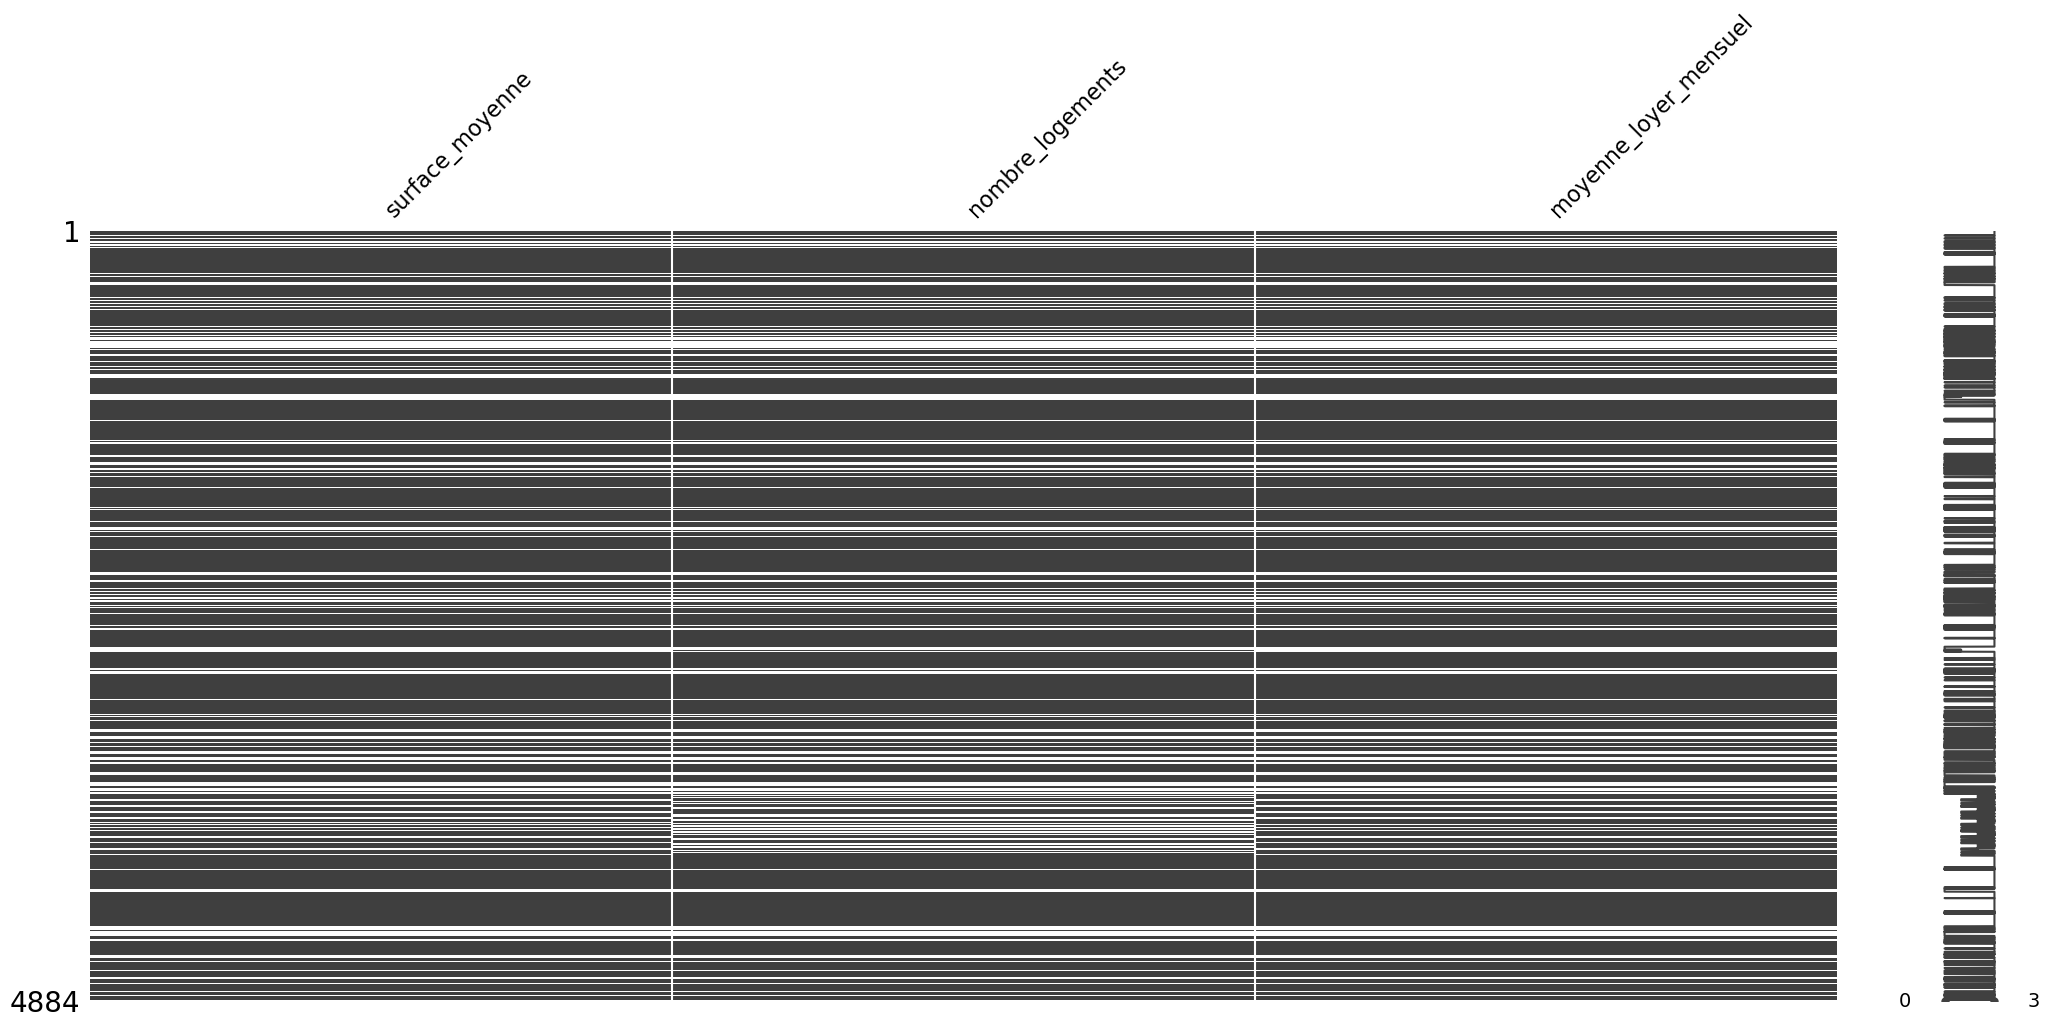

In [14]:
mno.matrix(data2)

In [16]:
data2.dropna(axis=0, inplace=True)

/tmp/ipykernel_48551/2261903736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(axis=0, inplace=True)


In [18]:
data2

,surface_moyenne,nombre_logements,moyenne_loyer_mensuel
0,450.0,670.0,9.0
1,600.0,798.0,1.0
2,650.0,1000.0,7.0
3,850.0,1205.0,6.0
4,350.0,455.0,5.0
...,...,...,...
4876,410.0,580.0,7.0
4877,580.0,680.0,5.0
4879,500.0,664.0,6.0
4881,521.0,620.0,2.0


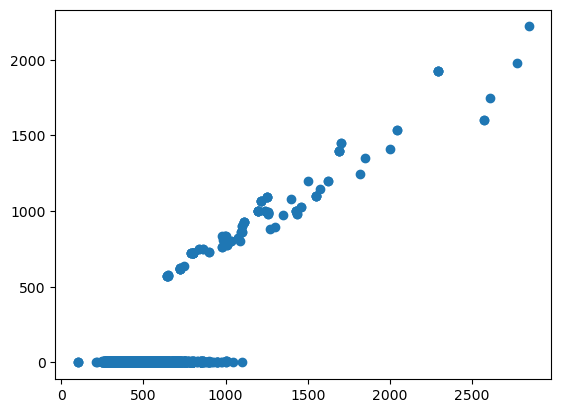

In [20]:
plt.scatter(data2['surface_moyenne'], data2['moyenne_loyer_mensuel'])

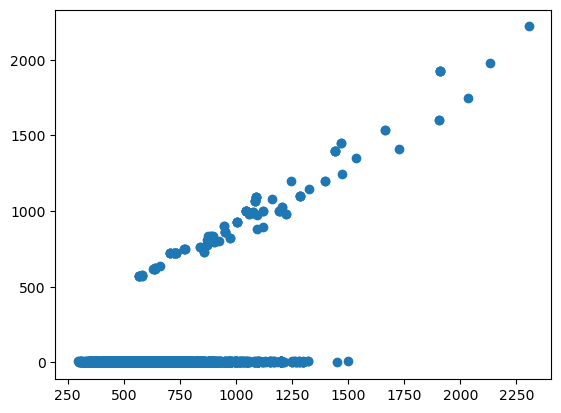

In [22]:
plt.scatter(data2['nombre_logements'], data2['moyenne_loyer_mensuel'])

/home/morel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/morel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/morel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


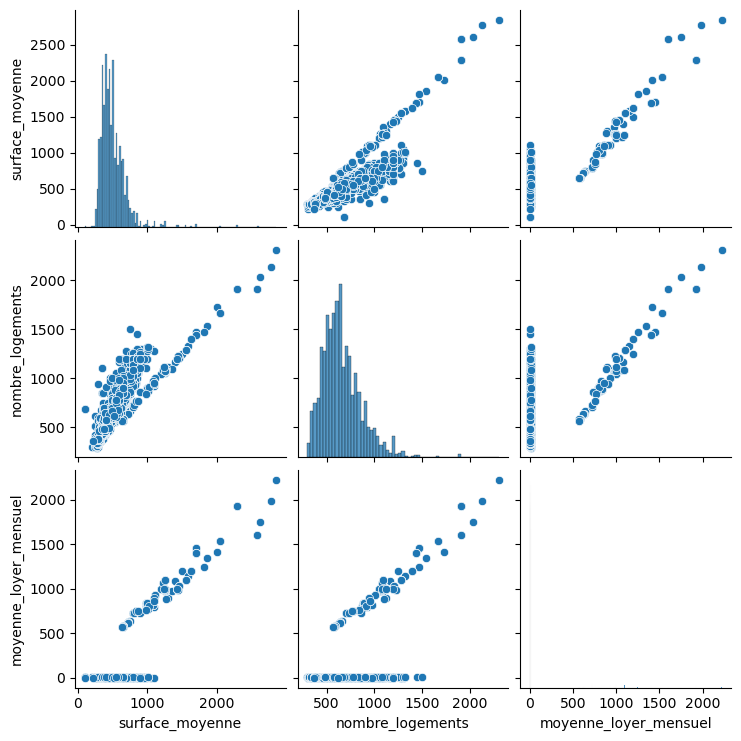

In [24]:
sns.pairplot(data2)

In [26]:
data2.corr()

,surface_moyenne,nombre_logements,moyenne_loyer_mensuel
surface_moyenne,1.000000,0.869148,0.758437
nombre_logements,0.869148,1.000000,0.443373
moyenne_loyer_mensuel,0.758437,0.443373,1.000000


In [28]:
data3 = data2[['surface_moyenne', 'nombre_logements']]
data3

,surface_moyenne,nombre_logements
0,450.0,670.0
1,600.0,798.0
2,650.0,1000.0
3,850.0,1205.0
4,350.0,455.0
...,...,...
4876,410.0,580.0
4877,580.0,680.0
4879,500.0,664.0
4881,521.0,620.0


Text(0.5, 1.0, 'Nombre de logements en fonction de la surface')

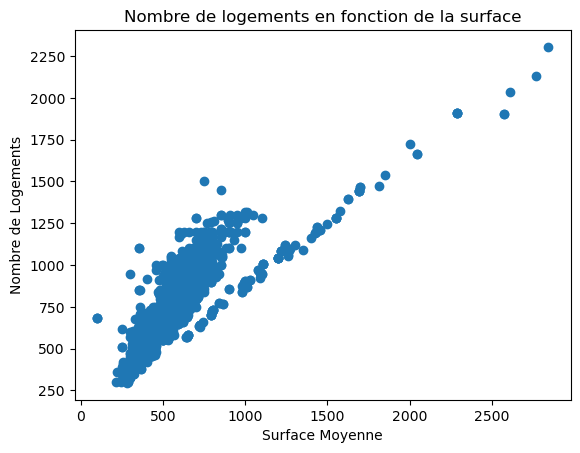

In [30]:
X = data3['surface_moyenne']
y = data3['nombre_logements']
plt.scatter(X, y)
plt.xlabel("Surface Moyenne")
plt.ylabel("Nombre de Logements")
plt.title("Nombre de logements en fonction de la surface")

<Axes: >

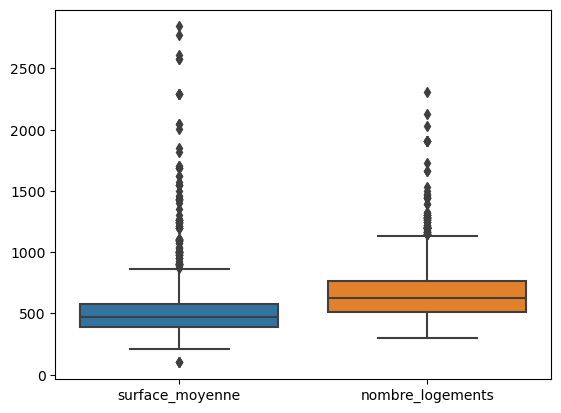

In [32]:
sns.boxplot(data3)

In [34]:
# outliners
def get_outliners(X):
    q1x = X.quantile(0.25)
    q3x = X.quantile(0.75)
    eiq = q3x - q1x
    x1 = q1x - 1.5 * eiq
    x3 = q3x + 1.5 * eiq
    return X[(X<=x1) | (X>=x3)]

In [36]:
len(get_outliners(X))

124

In [38]:
len(get_outliners(y))

109

In [40]:
X_ = get_outliners(X)
y_ = get_outliners(y)

In [42]:
# Marqurge des outliners 0:pour les points qui n'ont aucun coordonnée commme outliner
# 1: pour les points dont un seul coordonnée est outliner
# 2: pour les points dont tous les deux coordonnées sont outliners

data3['outliner'] = 0
data3.loc[X_.index, 'outliner'] = 1
data3.loc[y_.index, 'outliner'] += 1
data3

,surface_moyenne,nombre_logements,outliner
0,450.0,670.0,0
1,600.0,798.0,0
2,650.0,1000.0,0
3,850.0,1205.0,1
4,350.0,455.0,0
...,...,...,...
4876,410.0,580.0,0
4877,580.0,680.0,0
4879,500.0,664.0,0
4881,521.0,620.0,0


In [44]:
data3['outliner'].value_counts()

outliner
0    3436
1     109
2      62
Name: count, dtype: int64

/home/morel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/morel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


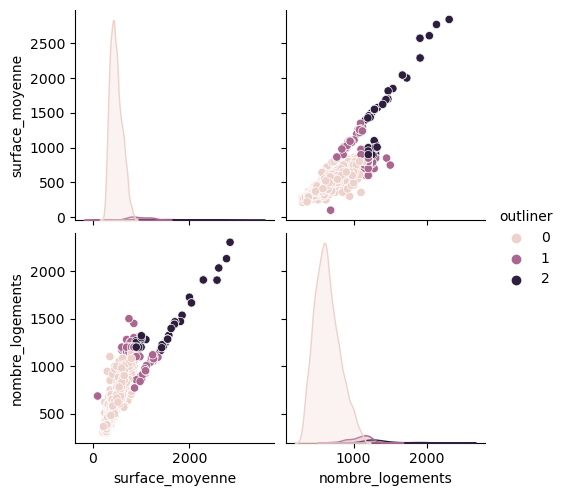

In [46]:
sns.pairplot(data3, hue='outliner')

<Axes: >

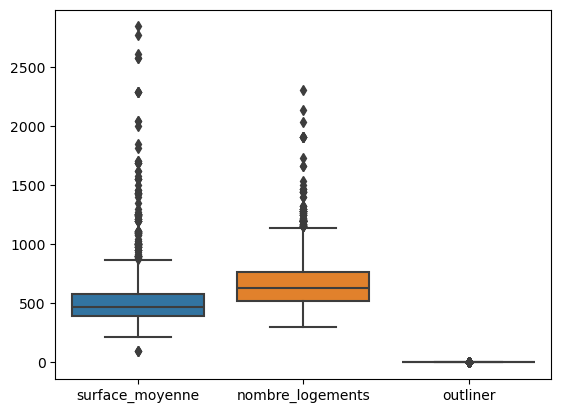

In [48]:
sns.boxplot(data3)

<Axes: xlabel='nombre_logements'>

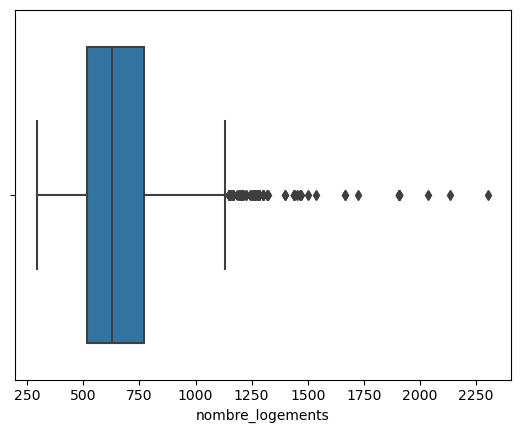

In [50]:
sns.boxplot(data3, x='nombre_logements', hue='outliner')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
X_train.shape

(2524,)

In [56]:
y_train.shape

(2524,)

In [58]:
X_test.shape

(1083,)

In [60]:
y_test.shape

(1083,)

In [62]:
regressor = LinearRegression()

In [68]:
X_train

1709    560.0
2073    365.0
839     320.0
1448    593.0
4694    404.0
        ...  
1624    641.0
2780    580.0
507     630.0
3425    490.0
4217    426.0
Name: surface_moyenne, Length: 2524, dtype: float64

In [70]:
y_train

1709    750.0
2073    442.0
839     350.0
1448    885.0
4694    603.0
        ...  
1624    880.0
2780    950.0
507     800.0
3425    660.0
4217    654.0
Name: nombre_logements, Length: 2524, dtype: float64

In [82]:
X_train.values.reshape(1, -1)

array([[560., 365., 320., ..., 630., 490., 426.]])

In [86]:
regressor.fit(X_train.values.reshape(1, -1), y_train.values.reshape(1, -1))

LinearRegression()